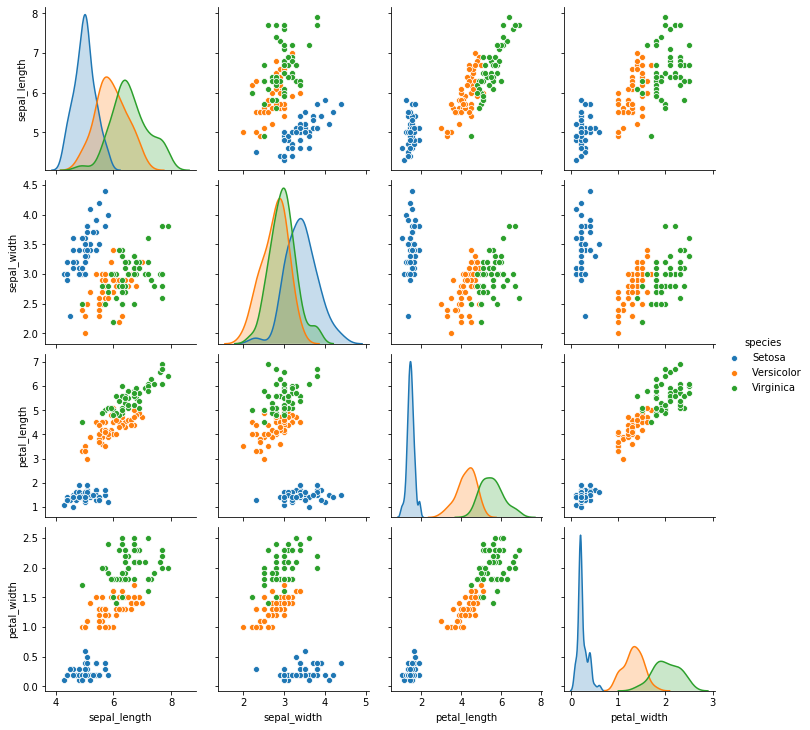

Epoch 1/50
150/150 [==============================] - 1s 4ms/step - loss: 1.6301 - accuracy: 0.3267
Epoch 2/50
150/150 [==============================] - 0s 2ms/step - loss: 1.1414 - accuracy: 0.4933
Epoch 3/50
150/150 [==============================] - 0s 2ms/step - loss: 0.9412 - accuracy: 0.4600
Epoch 4/50
150/150 [==============================] - 0s 2ms/step - loss: 0.7899 - accuracy: 0.7467
Epoch 5/50
150/150 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.7267
Epoch 6/50
150/150 [==============================] - 0s 2ms/step - loss: 0.5637 - accuracy: 0.8800
Epoch 7/50
150/150 [==============================] - 0s 2ms/step - loss: 0.5079 - accuracy: 0.8267
Epoch 8/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.9333
Epoch 9/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8867
Epoch 10/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8867

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

import pandas as pd #데이터 프레임
import seaborn as sns #시각화
import matplotlib.pyplot as plt #시각화
import numpy
import tensorflow as tf #keras의 backbone

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

#데이터 입력
df = pd.read_csv('C:/Users/JAELYANG/Desktop/4-1/기계학습/과제/4-1-dataset.csv',names = ["sepal_length", "sepal_width","petal_length","petal_width","species"])

#그래프로 확인
sns.pairplot(df, hue='species')
plt.show()

#데이터 분류
dataset = df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]

#문자열을 숫자로 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = np_utils.to_categorical(Y) # one-hot-encoding

#모델의 설정
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

#모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#모델 실행
model.fit(X, Y_encoded, epochs=50, batch_size=1)

#결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X,Y_encoded)[1]))

